# Student Marks Predictor

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [158]:
data = pd.read_csv("student.csv")

In [159]:
print(data.isnull().sum())

Hours       0
Sleep       0
Revision    0
Marks       0
dtype: int64


In [160]:
data.fillna(data.mean, inplace=True)

### Feature Scalling

In [161]:
from sklearn.preprocessing import StandardScaler

In [162]:
scaler = StandardScaler()
X = data[['Hours', 'Sleep', 'Revision']]
y = data[['Marks']]

X = scaler.fit_transform(X)

### Train Test Split

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

### Train the Model

In [165]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [166]:
reg.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Prediction

In [167]:
y_pred = reg.predict(x_test)

In [168]:
print(y_pred)

[[17.39215686]
 [ 3.39705882]]


### Model Evaluation

In [169]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [170]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

In [171]:
print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\nR2-SCORE : {r2_score}")

MAE : 0.5024509803921604
MSE : 0.26356449442522567
RMSE : 0.5133853274346918
R2-SCORE : 0.995314408987996


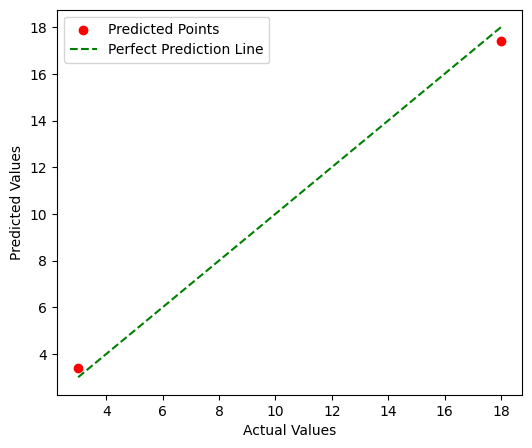

In [172]:
plt.figure(figsize=(6,5))

# Actual vs Predicted points
plt.scatter(y_test, y_pred, label='Predicted Points', color='red')

# Ideal line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--',
    color = 'green',
    label='Perfect Prediction Line'
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


### Prediction

In [173]:
Hours = float(input("Enter Hours "))
Sleep = float(input("Enter Sleep "))
Revision = float(input("Enter Revision "))

In [174]:
data = pd.DataFrame([{
    'Hours': Hours,
    'Sleep': Sleep,
    'Revision': Revision
}])
print(data)

   Hours  Sleep  Revision
0    5.0    6.0       7.0


In [175]:
data = scaler.fit_transform(data)

In [176]:
marks = reg.predict(data)

In [177]:
print(round(marks[0][0],1))

10.7
